In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model


In [2]:
# Load CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Reduce dataset size to 10,000 for training and 2,000 for testing
x_train, y_train = x_train[:500], y_train[:500]
x_test, y_test = x_test[:500], y_test[:500]

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten label values
y_train, y_test = y_train.flatten(), y_test.flatten()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)  # Check new dataset size


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(500, 32, 32, 3) (500,) (500, 32, 32, 3) (500,)


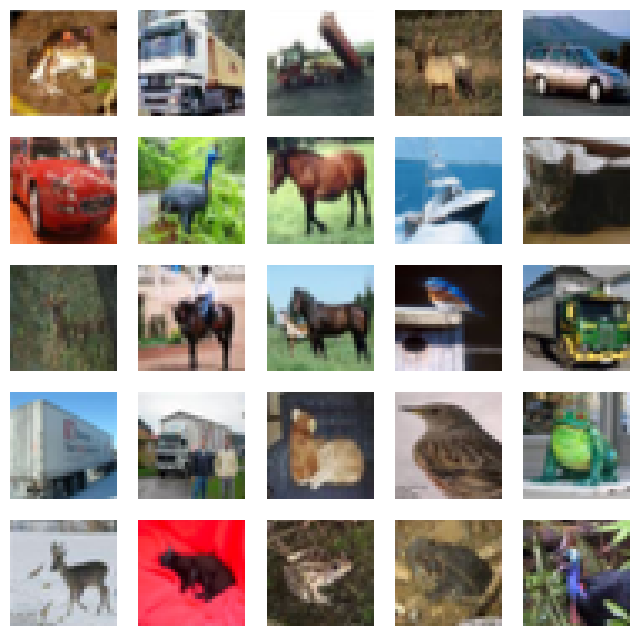

In [3]:
fig, ax = plt.subplots(5, 5, figsize=(8,8))
k = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k])
        ax[i][j].axis('off')
        k += 1
plt.show()


In [4]:
# Number of classes
K = len(set(y_train))

# Build a better CNN Model with more layers
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.3)(x)

# Hidden layer
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer
x = Dense(K, activation='softmax')(x)

# Create the model
model = Model(i, x)

# Display model summary
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,114,922 (4.25 MB)

 Trainable params: 1,113,514 (4.25 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=20)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 467ms/step - accuracy: 0.1958 - loss: 3.7343 - val_accuracy: 0.1040 - val_loss: 2.3480
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.3158 - loss: 2.3871 - val_accuracy: 0.1020 - val_loss: 2.8349
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 345ms/step - accuracy: 0.4439 - loss: 1.6109 - val_accuracy: 0.1020 - val_loss: 3.4715
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 322ms/step - accuracy: 0.6163 - loss: 1.1709 - val_accuracy: 0.0980 - val_loss: 4.6544
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - accuracy: 0.6963 - loss: 0.9000 - val_accuracy: 0.0840 - val_loss: 4.9436
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - accuracy: 0.7947 - loss: 0.6863 - val_accuracy: 0.0820 - val_loss: 5.8308
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - accuracy: 0.8131 - loss: 0.5787 - val_accuracy: 0.0860 - val_loss: 6.6259
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 396ms/step - accuracy: 0.8519 - loss: 0.4026 - val_accurac

In [7]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

# Continue training with augmented data for 3 more epochs
history = model.fit(
    train_generator, validation_data=(x_test, y_test),
    steps_per_epoch=steps_per_epoch, epochs=20)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step - accuracy: 0.5683 - loss: 1.9181 - val_accuracy: 0.1140 - val_loss: 5.1027
Epoch 2/20
 1/15 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.4062 - loss: 2.2787

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4062 - loss: 2.2787 - val_accuracy: 0.1220 - val_loss: 4.9376
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.4956 - loss: 1.6624 - val_accuracy: 0.2540 - val_loss: 2.3171
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7000 - loss: 1.1391 - val_accuracy: 0.2600 - val_loss: 2.3047
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - accuracy: 0.5367 - loss: 1.4086 - val_accuracy: 0.1960 - val_loss: 3.3006
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.5625 - loss: 1.3313 - val_accuracy: 0.1840 - val_loss: 3.2980
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 337ms/step - accuracy: 0.5645 - loss: 1.2294 - val_accuracy: 0.1900 - val_loss: 3.0596
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.5938 - loss: 1.3119 - val_accuracy: 0.2040 - val_loss: 2.9492
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 517ms/step - accuracy: 0.6201 - loss: 1.0333 - val_accuracy: 0.1800 - val_los

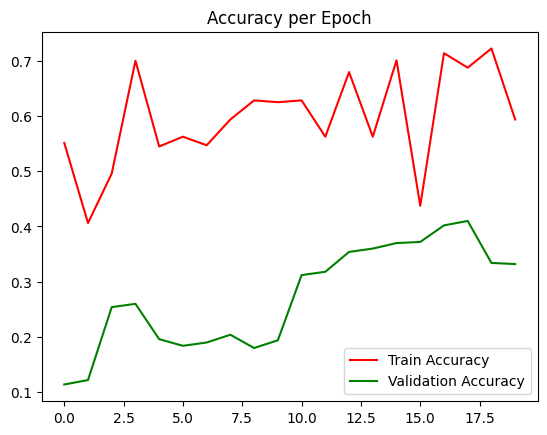

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
Original label: bird, Predicted label: airplane


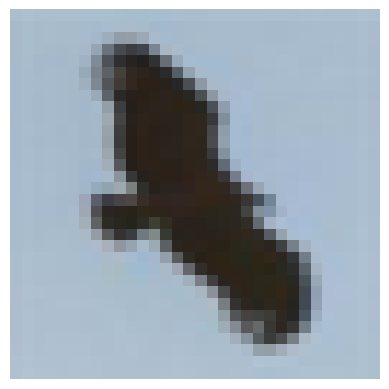

In [9]:
# CIFAR-10 class labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Select a random test image
image_number = 160

# Display the original image
plt.imshow(x_test[image_number])
plt.axis('off')

# Prepare image for prediction
n = np.array(x_test[image_number]).reshape(1, 32, 32, 3)

# Get the predicted label
predicted_label = labels[model.predict(n).argmax()]

# Get the original label
original_label = labels[y_test[image_number]]

# Display the results
print(f"Original label: {original_label}, Predicted label: {predicted_label}")
